# Демонстрация работы различных сред библиотеки gymnasium

Рассмотрим работу различных сред из библиотеки `gymnasium` (ранее OpenAI Gym). 

https://gymnasium.farama.org/

Установить эту среду можно командой

    pip install gymnasium[all]

In [34]:
!pip install gymnasium[all]

   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 3.0/3.0 MB 31.7 MB/s  0:00:00
   ---------------------------------------- 0.0/60.5 MB ? eta -:--:--
   ------------ --------------------------- 18.4/60.5 MB 90.7 MB/s eta 0:00:01
   ------------------------ --------------- 37.0/60.5 MB 91.7 MB/s eta 0:00:01
   ------------------------------------ --- 55.8/60.5 MB 92.4 MB/s eta 0:00:01
   ---------------------------------------  60.3/60.5 MB 92.4 MB/s eta 0:00:01
   ---------------------------------------- 60.5/60.5 MB 71.1 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 51.8 MB/s  0:00:00
   ---------------------------------------- 0.0/31.2 MB ? eta -:--:--
   ------------------------- -------------- 19.7/31.2 MB 98.5 MB/s eta 0:00:01
   ---------------------------------------  31.2/31.2 MB 98.9 MB/s eta 0:00:01
   ---------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'd:\\anaconda3\\lib\\site-packages\\pil\\_imaging.cp313-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [35]:
# загрузка библиотеки gymnasium
import gymnasium as gym
gym.__version__

'1.2.3'

Создание экземпляра среды осуществляется командой

    env = gym.make('EnvTitle')
    
где `EnvTitle` -- это название среды. 

У экземпляра среды есть метод `env.reset()` для помещения среды в начальное состояние. 

Для визуализации состояния среды можно воспользоваться методом `env.render()`.

Для завершения работы со средой необходимо использовать метод `env.close()`.

Получить описание пространства состояний и действий для выбранной среды можно командами

    env.observation_space
    env.action_space

В частности, выдать случаное состояние или действие можно командами

    env.observation_space.sample()
    env.action_space.sample()

Для различных сред напечатаем начальное состояние, число действий. А также запустим симуляцию работы среды, выбирая действия случайным образом.

### Среда FrozenLake

Для анимированного рендеринга сред потребуется библиотека `pygame`.
Её можно установить командой 

    pip install pygame

In [36]:
# создание экземпляра среды
env = gym.make('FrozenLake-v1')

# обнуление среды и получение начального состояния
state, _ = env.reset()
print("Начальное состояние:", state)

# возможные действия
print("Количество действий:", env.action_space.n)

# выведем описания пространств состояний и действий
print("Пространство состояний:", env.observation_space)
print("Пространство действий:", env.action_space)

Начальное состояние: 0
Количество действий: 4
Пространство состояний: Discrete(16)
Пространство действий: Discrete(4)


Для данной среды пространство состояний имеет вид `Discrete(16)`. Это значит среда имеет 16 дискретных состояний.
Пространство действий имеет вид `Discrete(4)`. Это значит агенту доступно 4 дискретных действия.

Запустим симуляцию среды со случайными действями. Для выбора случайного действия можно использовать команду 

    action = env.action_space.sample()
    
Для перехода к новому состоянию среды по сделанному действию и текущему состоянию используется команда `env.step(action)`.
Эта команда также позволяет получить кортеж из 5 аргументов: 

    (новое состояние, 
    вознаграждение, 
    флаг о достижении заключительного состояния, 
    флаг об остановке взаимодействия по времени, 
    прочая информация).

In [37]:
# для запуска среды надо установить
!pip install "gymnasium[toy-text]"

In [38]:
# создание симуляции с автоматическим рендерингом изображения
# установим также ограничение на количество шагов, так как действия случайны
env = gym.make('FrozenLake-v1', render_mode = 'human', max_episode_steps=50)
# обнуление среды и получение начального состояния
state, _ = env.reset()

# для записи дохода
gain = 0
# флаг о конце эпизода
episode_over = False

while not episode_over:
    # выбор действия
    action = env.action_space.sample()
    # совершение действия и переход среды к новому состоянию, 
    # получение вознаграждения и автоматический рендер изображения
    state, reward, terminated, truncated, info = env.step(action)
    # обновление дохода
    gain += reward
    # обновления флагп о конце эпизода
    episode_over = terminated or truncated
    
print("Доход:", gain)
# завершить взаимодействие со средой
env.close()

Доход: 0


Чтобы создать среду без автоматического рендеринга изображения можно использовать команду

    env = gym.make('FrozenLake-v1', render_mode = None)

или просто

    env = gym.make('FrozenLake-v1')

так как параметр `render_mode` имеет по умолчанию значение `None`. 

Ряд простых сред можно также запустить с упрощённым рендерингом в текстовом формате. Для этого при создании среды надо указать параметр `render_mode="ansi"`. Приведём пример запуска симуляции с таким способом рендеринга.

In [7]:
# подгрузка дополнительных библиотек
import time
from IPython.display import clear_output

# создание симуляции с упрощённым рендерингом изображения
env = gym.make('FrozenLake-v1', render_mode="ansi", max_episode_steps=50)
state, _ = env.reset()
# печать начального состояния
print(env.render())

gain = 0
episode_over = False

while not episode_over:
    # выбор действия
    action = env.action_space.sample()
    # переход среды к новому состоянию
    state, reward, terminated, truncated, info = env.step(action)
    
    gain += reward
    episode_over = terminated or truncated
    
    # печать упрощённого рендеринга
    time.sleep(.2)
    clear_output(wait=True)
    print(env.render())
    
print("Доход:", gain)
# завершить взаимодействие со средой
env.close() 

  (Down)
SFFF
FHFH
FFFH
HFFG

Доход: 0


Цель агента в этой среде заключается в том, чтобы провести человечка по льду от старта до цели.

### Среда Taxi

Рассмотрим ещё одну среду, схожую с предыдущей.

In [8]:
# создание экземпляра среды
env = gym.make('Taxi-v3')

# обнуление среды и получение начального состояния
state, _ = env.reset()
print("Начальное состояние:", state)

# возможные действия
print("Количество действий:", env.action_space.n)

# выведем описания пространств состояний и действий
print("Пространство состояний:", env.observation_space)
print("Пространство действий:", env.action_space)

Начальное состояние: 87
Количество действий: 6
Пространство состояний: Discrete(500)
Пространство действий: Discrete(6)


Пространство состояний состоит из 500 дискретных состояний. Агенту доступно 6 дискретных действий. Запустим симуляцию среды со случайными действями. 

При создании среды можно использовать дополнительные классы-обёртки для среды. См. подробности:

https://gymnasium.farama.org/api/wrappers/

Добавим обёртку для автоматического слежения за показателем дохода за эпизод. Доход записывается к специальную структуру данных - очередь (англ. queue).

In [10]:
# создание симуляции с автоматическим рендерингом изображения
env = gym.make('Taxi-v3', render_mode = 'human', max_episode_steps=50)
# добавление обёртки
env = gym.wrappers.RecordEpisodeStatistics(env)

state, _ = env.reset()
episode_over = False

while not episode_over:
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated
    
print("Доход:", env.return_queue)
env.close()

Доход: deque([-221.0], maxlen=100)


Цель агента в том, чтобы, управляя такси, подобрать пассажира и довезти его до места назначения.

### Среда MountainCar

Рассмотрим среду с непрерывным пространством состояний.

In [11]:
# создание экземпляра среды
env = gym.make('MountainCar-v0')

# обнуление среды и получение начального состояния
state, _ = env.reset()
print("Начальное состояние:", state)

# возможные действия
print("Количество действий:", env.action_space.n)

# выведем описания пространств состояний и действий
print("Пространство состояний:", env.observation_space)
print("Пространство действий:", env.action_space)

Начальное состояние: [-0.41410267  0.        ]
Количество действий: 3
Пространство состояний: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Пространство действий: Discrete(3)


Для этой среды пространство состояний имеет вид `Box([-1.2  -0.07], [0.6  0.07], (2,), float32)`. 
Третий аргумент `(2,)` указывает на то, сколько параметров задают состояние. В данном случае их два. А первые два аргумента отвечают за интервалы, в которых эти параметры могут непрерывно изменяться. Более подробно, первые координаты у списков `[-1.2  -0.07], [0.6  0.07]` указывают интервал `[-1.2, 0.6]`, где может меняться первый параметр состояния, и аналогичным образом в интервале `[-0.07, 0.07]` изменяется второй параметр.

In [12]:
# создание симуляции с автоматическим рендерингом изображения
env = gym.make('MountainCar-v0', render_mode = 'human')
env = gym.wrappers.RecordEpisodeStatistics(env)
state, _ = env.reset()
episode_over = False

while not episode_over:
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated
    
print("Доход:", env.return_queue)
env.close()

Доход: deque([-200.0], maxlen=100)


Цель агента в том, чтобы втолкнуть машину на вершину холма справа.

### Среда CartPole

Рассмотрим ещё одну среду с задачей удержания маятника с непрерывным пространством состояний.

In [14]:
# создание экземпляра среды
env = gym.make('CartPole-v1')

# обнуление среды и получение начального состояния
state, _ = env.reset()

# возможные действия
print("Количество действий:", env.action_space.n)

# выведем описания пространств состояний и действий
print("Пространство состояний:", env.observation_space)
print("Пространство действий:", env.action_space)

Количество действий: 2
Пространство состояний: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Пространство действий: Discrete(2)


У этой среды пространство состояний задаётся 4 параметрами.

In [15]:
# создание симуляции с автоматическим рендерингом изображения
env = gym.make('CartPole-v1', render_mode = 'human')
env = gym.wrappers.RecordEpisodeStatistics(env)
state, _ = env.reset()
episode_over = False

while not episode_over:
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated
    
print("Доход:", env.return_queue)
env.close()

Доход: deque([26.0], maxlen=100)


Цель агента в том, чтобы удерживать маятник длительное время в вертикальном положении, управляя тележкой.

### Среда LunarLander

Ещё одна среда с непрерывным пространством состояний о посадке лунного модуля.

Для рендеринга среды потребуется установить дополнительные библиотеки

    pip install swig
    pip install gymnasium[box2d]
    
Также при установке библиотеки `swig`, потребуется установить Microsoft C++ Build Tools 

(см. подробнее https://www.youtube.com/watch?v=gMgj4pSHLww, в этом же видео можно найти настройки работы с библиотекой `gymnasium` в Visual Studio).

In [17]:
!pip install "gymnasium[box2d]"

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 10.0 MB/s  0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 2.5/2.5 MB 46.9 MB/s  0:00:00

   ---------------------------------------- 0/2 [swig]
   ---------------------------------------- 0/2 [swig]
   ---------------------------------------- 0/2 [swig]
   -------------------- ------------------- 1/2 [box2d]
   -------------------- ------------------- 1/2 [box2d]
   -------------------- ------------------- 1/2 [box2d]
   -------------------- ------------------- 1/2 [box2d]
   -------------------- ------------------- 1/2 [box2d]
   -------------------- ------------------- 1/2 [box2d]
   -------------------- ------------------- 1/2 [box2d]
   -------------------- ------------------- 1/2 [box2d]
   ----------------------------

In [18]:
# создание экземпляра среды
env = gym.make('LunarLander-v3')

# обнуление среды и получение начального состояния
state, _ = env.reset()
print("Начальное состояние:", state)

# возможные действия
print("Количество действий:", env.action_space.n)

# выведем описания пространств состояний и действий
print("Пространство состояний:", env.observation_space)
print("Пространство действий:", env.action_space)

Начальное состояние: [-0.00294552  1.4026525  -0.29836255 -0.3674573   0.00341988  0.06758343
  0.          0.        ]
Количество действий: 4
Пространство состояний: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
Пространство действий: Discrete(4)


У этой среды пространство состояний задаётся 8 параметрами.

In [19]:
# создание симуляции с автоматическим рендерингом изображения
env = gym.make('LunarLander-v3', render_mode = 'human')
env = gym.wrappers.RecordEpisodeStatistics(env)
state, _ = env.reset()
episode_over = False

while not episode_over:
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated
    
print("Доход:", env.return_queue)
env.close()

Доход: deque([np.float64(-162.70461915483992)], maxlen=100)


Цель агента в том, чтобы аккуратно посадить лунный модуль.

### Среды с моделированием движущихся механических объектов MuJoCo

Для запуска этих сред потребуется библиотека `mujoco` 

    pip install gymnasium[mujoco]

In [22]:
!pip install "gymnasium[mujoco]"

  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
   ---------------- ----------------------- 2.4/5.7 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 5.7/5.7 MB 31.4 MB/s  0:00:00
   ---------------------------------------- 0.0/559.5 kB ? eta -:--:--
   ---------------------------------------- 559.5/559.5 kB 29.2 MB/s  0:00:00
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 3.2/3.2 MB 34.4 MB/s  0:00:00

   ---------------------------------------- 0/5 [pyopengl]
   ---------------------------------------- 0/5 [pyopengl]
   ---------------------------------------- 0/5 [pyopengl]
   ---------------------------------------- 0/5 [pyopengl]
   ---------------------------------------- 0/5 [pyopengl]
   ---------------------------------------- 0/5 [pyo

In [23]:
import mujoco
print("mujoco version:", mujoco.__version__)

mujoco version: 3.5.0


In [24]:
# создание экземпляра среды
env = gym.make('Humanoid-v5')

# обнуление среды 
state, _ = env.reset()

# выведем описания пространств состояний и действий
print("Пространство состояний:", env.observation_space)
print("Пространство действий:", env.action_space)

Пространство состояний: Box(-inf, inf, (348,), float64)
Пространство действий: Box(-0.4, 0.4, (17,), float32)


Запустим симуляцию этой среды со случайными действиями.

In [25]:
# создание симуляции с автоматическим рендерингом изображения
env = gym.make('Humanoid-v5', render_mode = 'human')
env = gym.wrappers.RecordEpisodeStatistics(env)
state, _ = env.reset()
episode_over = False

while not episode_over:
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated
    
print("Доход:", env.return_queue)
env.close()

Доход: deque([np.float64(82.54904238280047)], maxlen=100)


### Среды с играми от Atari

Для запуска игр от Atari потребуется установить дополнительные библиотеки

    pip install ale-py

Состояния среды в играх от Atari представляют собой скрины изображения экрана с игрой.

Рассмотрим, например, среду с игрой Breakout.

In [27]:
!pip install ale-py

   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.5 MB ? eta -:--:--
   ---------------------------------------- 3.5/3.5 MB 19.3 MB/s  0:00:00


Начальное состояние:
Количество действий: 4
Пространство состояний: Box(0, 255, (210, 160, 3), uint8)
Пространство действий: Discrete(4)


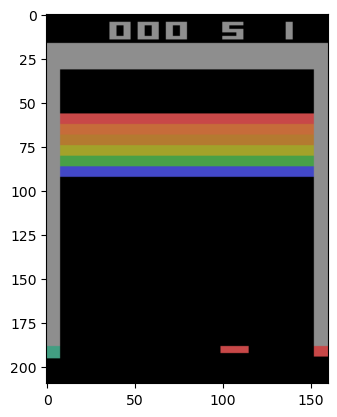

In [28]:
import gymnasium as gym
from matplotlib import pyplot as plt
import ale_py

# регистрируем среды в gym
gym.register_envs(ale_py)

# создание экземпляра среды
env = gym.make("ALE/Breakout-v5")

# обнуление среды и получение начального состояния
state, _ = env.reset()
print("Начальное состояние:")
plt.imshow(state)

# возможные действия
print("Количество действий:", env.action_space.n)

# выведем описания пространств состояний и действий
print("Пространство состояний:", env.observation_space)
print("Пространство действий:", env.action_space)

У этой среды пространство состояний является изображением размера $210*160*3$, пиксели принимают значения от 0 до 255.

In [29]:
# создание симуляции с автоматическим рендерингом изображения
#env = gym.make("ALE/Breakout-v5", render_mode = 'human')
#env = gym.make("ALE/Pong-v5", render_mode="human")
env = gym.make("ALE/MsPacman-v5", render_mode="human")
env = gym.wrappers.RecordEpisodeStatistics(env)
state, _ = env.reset()
episode_over = False

while not episode_over:
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated
    
print("Доход:", env.return_queue)
env.close()

Доход: deque([210.0], maxlen=100)


Для сред, моделирующих игры от Atari, возникает ошибка с закрытием окна, в котором рендерится изображение. Причём вручную его можно закрыть только с ошибкой и перезапуском ядра. 

Для закрытия этого окошка без ошибки можно использовать код ниже.

In [30]:
env = gym.make("ALE/Breakout-v5", render_mode = 'human')
env.close()
env

<OrderEnforcing<PassiveEnvChecker<AtariEnv<ALE/Breakout-v5>>>>

Список всех доступных сред можно вывести командой `print(gym.envs.registry.keys())`.

In [31]:
# вывод всех доступных сред
print(gym.envs.registry.keys())

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v3', 'LunarLanderContinuous-v3', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v3', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v1', 'CliffWalkingSlippery-v1', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Reacher-v5', 'Pusher-v2', 'Pusher-v4', 'Pusher-v5', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedPendulum-v5', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedDoublePendulum-v5', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'HalfCheetah-v5', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Hopper-v5', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Swimmer-v5', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Walker2d-v5', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Ant-v5', 'Humanoid-v2', 'Humanoid-v3', 

Версии используемых библиотек

In [33]:
import gymnasium
print("gymnasium version:", gymnasium.__version__)
import swig
print("swig version:", swig.__version__)
import mujoco
print("mujoco version:", mujoco.__version__)
import ale_py
print("ale_py version:", ale_py.__version__)

gymnasium version: 1.2.3
swig version: 4.4.1
mujoco version: 3.5.0
ale_py version: 0.11.2
